# Making molecular cartoons with CellScape 

In [1]:
import cellscape

## General workflow
1. create a new `cellscape.cartoon.Cartoon` object from a PDB structure
1. open up an NGLView widget and choose desired orientation, or load a rotation matrix from an external file
1. call `outline()` to collapse the structure down to a 2D view
1. call `plot()` to plot and save the outline

This workflow is illustrated in more detail by the examples below:

In [2]:
# specific chains can be selected with a string e.g. "ABC" to select chains A, B, and C
ig = cellscape.cartoon.Cartoon('ig/1igt.pdb', chain="all")

_ColormakerRegistry()

In [3]:
# create an NGLView widget to visualize and orient the protein
ig.view

NGLWidget()

In [4]:
# alternatively, load a view matrix from a file
ig.load_view_matrix("ig/view")

### Outline entire structure

In [5]:
# create outline from all atoms in the protein structure
ig.outline()

Outlined some atoms!


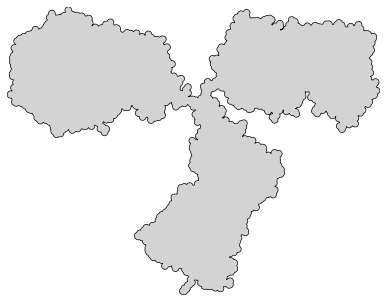

In [6]:
# plot outline generated previously
ig.plot()

### Outline each chain separately

In [7]:
ig.outline(by="chain")

Outlined some atoms!


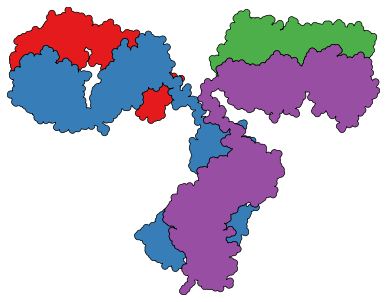

In [8]:
ig.plot()

### Outline each residue

In [9]:
ig.outline(by="residue")

Outlined some atoms!


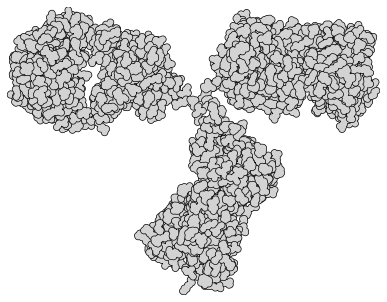

In [10]:
ig.plot()

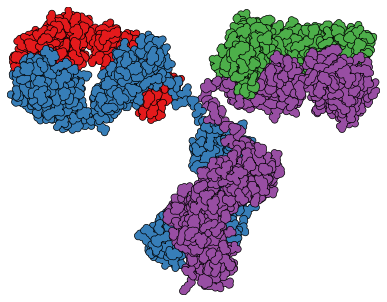

In [11]:
ig.plot(color_residues_by="chain")

Shading can be added to simulate depth. The resulting image can be saved by the `save` option. For vector graphics use an extension of `pdf`, `svg`, `ps`. For images with many polygons (such as these), vector formats may result in larger files.

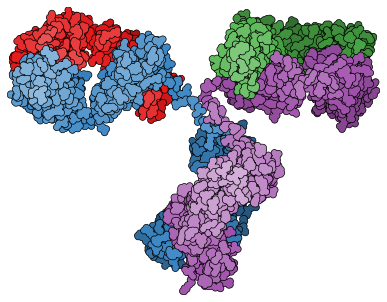

In [12]:
ig.plot(color_residues_by="chain", shading=True, save="ig.png")

## More examples

### Plotting styles and color schemes

In [13]:
ig.outline(by="chain")

Outlined some atoms!


#### Show axis labels (in angstroms)

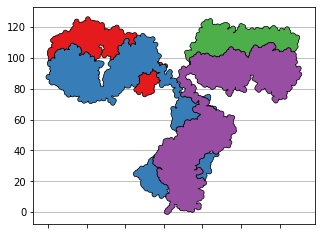

In [14]:
ig.plot(axes_labels=True)

#### Specify different matplotlib color scheme

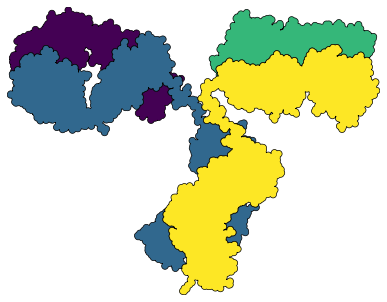

In [15]:
ig.plot(colors="viridis")

#### Define custom color scheme with a list

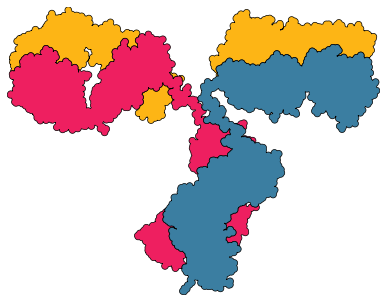

In [16]:
ig.plot(colors=['#FDB515','#EE1F60','#FDB515','#3B7EA1'])

#### Define custom color scheme with a dictionary

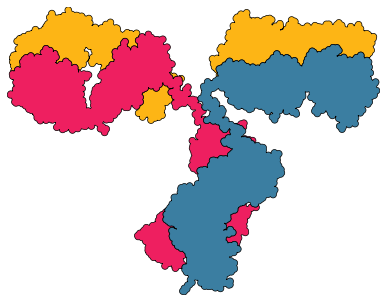

In [17]:
ig.plot(colors={"A":'#FDB515', "B":'#EE1F60', "C":'#FDB515', "D":'#3B7EA1'})

### Lower level figure control with `matplotlib`

In [18]:
import matplotlib.pyplot as plt

#### Call `pyplot.savefig` separately

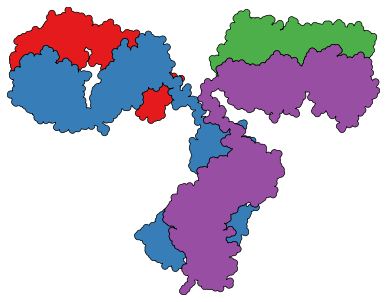

In [19]:
ig.plot(do_show=False)
plt.savefig("example.png", dpi=300)

#### Pass existing `matplotlib.Axes` instance instead of generating one

Outlined some atoms!


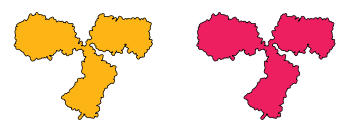

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_axis_off()
ax2.set_axis_off()
ig.outline()
ig.plot(do_show=False, axes=ax1, axes_labels=False, colors='#FDB515')
ig.plot(do_show=False, axes=ax2, axes_labels=False, colors='#EE1F60')
plt.show()

### Input/output options

In [21]:
# save current NGLView matrix to be loaded later
ig.save_view_matrix("example_view")

In [22]:
# load view matrix from file
ig.load_view_matrix("example_view")

In [23]:
# export Cartoon object for use with cellscape scene
ig.export("example_object")